# Analysis of Apple Users' Reviews and Sentiments

## Introduction
I conducted a sentimental analysis on the reviews of Apple users to derive insights on how these users felt about the products and services of Apple with the aid of Natural Language Processing techniques(NLP). Trustpilot is an online site where users of different brands and products leave reviews and feedbacks about whatever service they received from these brands, therefore I had to get these reviews by heading to Trustpilot and scraping the pages of this site for Apple company. Using different python libraries like Pandas to clean and manipulate data, BeautifulSoup for web scraping , Natural Language Toolkit(NLTK) and TextBlob for Sentiment Analysis, MatPlotlib and WordCloud for Data Exploration and Visualization, I was able to perform sentimental analysis on these reviews.

## Contents
1. [Introduction](https://github.com/OluwanifemiAjayi/Apple-Sentiment-Analysis/edit/main/README.md#introduction)

2. [Web Scraping and Data Gathering](https://github.com/OluwanifemiAjayi/Apple-Sentiment-Analysis/edit/main/README.md#web-scraping-and-data-gathering)

3. [Data Evaluation and Cleaning](https://github.com/OluwanifemiAjayi/Apple-Sentiment-Analysis/edit/main/README.md#data-evaluation-and-data-cleaning)

4. [Data Preprocessing](https://github.com/OluwanifemiAjayi/Apple-Sentiment-Analysis/edit/main/README.md#data-preprocessing)

5. [Sentiment Analysis](https://github.com/OluwanifemiAjayi/Apple-Sentiment-Analysis/edit/main/README.md#sentiment-analysis)

6. [Data Exploration and Visualization](https://github.com/OluwanifemiAjayi/Apple-Sentiment-Analysis/edit/main/README.md#data-exploration-and-visualization)

7. [Conclusion](https://github.com/OluwanifemiAjayi/Apple-Sentiment-Analysis/edit/main/README.md#conclusion)

## 2. Web Scraping and Data Gathering

The first thing I did was to import all the libraries that I needed for this sentiment analysis into my Jupyter notebook and as need arose for importing more libraries, I added them along the project.
I used the BeautifulSoup library to scrape the first 200 pages of the Trustpilot website for Apple brand, taking it 100 pages twice to speed up the process, I created functions that retrieved the data I needed for my analysis while also stripping away every other character except for the text needed and putting them into lists. Then I went ahead to create my DataFrame.

In [6]:
# Import necessary libraries
from bs4 import BeautifulSoup  # For parsing HTML and XML documents
import requests  # For making HTTP requests to fetch web content
from time import sleep  # To pause the program execution
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import country_converter as coco  # For converting country names to different formats
import re  # For regular expression operations
import string  # For string operations
import matplotlib.pyplot as plt  # For creating visualizations
from datetime import datetime, timedelta  # For handling dates and times
from collections import Counter  # For counting hashable objects

# Importing machine learning libraries for text analysis
from sklearn.feature_extraction.text import CountVectorizer  # For converting text to a matrix of token counts
from sklearn.decomposition import LatentDirichletAllocation  # For topic modeling

# Importing Natural Language Toolkit (NLTK) for text processing
import nltk
nltk.download('punkt')  # Tokenizer models
nltk.download('stopwords')  # Stop words corpus
nltk.download('words')  # English words corpus
nltk.download('averaged_perceptron_tagger')  # Part of speech tagging models
nltk.download('wordnet')  # WordNet lexical database

from nltk.tokenize import word_tokenize  # For splitting text into words
from nltk.corpus import stopwords, words  # Stop words and English words corpora
from nltk.stem import WordNetLemmatizer  # For lemmatizing words (reducing them to their base form)
from nltk import pos_tag  # For part of speech tagging
from wordcloud import WordCloud, STOPWORDS  # For generating word clouds
from textblob import TextBlob  # For processing textual data and performing sentiment analysis

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\khan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\khan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def soup2list(soup_elements, target_list, attribute=None): # Extracts text or attribute values from a list of BeautifulSoup elements and appends them to a target list.
     for element in soup_elements:
        if attribute:
            value = element.get(attribute)  # Get the attribute value if specified
            if value is not None:
                target_list.append(value)  # Append the attribute value to the target list if it exists
        else:
            text = element.get_text(strip=True)  # Get the text content of the element
            if text:
                target_list.append(text)  # Append the text content to the target list if it is not empty


In [3]:
reviews = []
review_count = []
rated = []
name = []
locations = []
dates = []
# Create empty lists to hold the data to be scraped

In [4]:
# Define the range of pages to scrape
first_page = 1  # Starting page number
last_page = 100  # Ending page number

# Define the company website to scrape reviews from
company = 'www.apple.com'

In [5]:
for i in range(first_page, last_page + 1): #Loop through the specified range of pages on Trustpilot, extract review data, and append it to corresponding lists.
    
    page = requests.get(fr"https://www.trustpilot.com/review/www.apple.com?page={i}") # Fetch the page content using requests.get and format the URL with the current page number
    
    response = BeautifulSoup(page.content, 'html.parser') # Parse the fetched page content with BeautifulSoup
    
    soup2list(response.find_all('div', {'class': 'styles_reviewContent__0Q2Tg'}), reviews) # Extract review content and append to the 'reviews' list
    soup2list(response.find_all('span', {'class': 'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l'}), review_count) # Extract the review count and append to the 'review_count' list
    soup2list(response.find_all('div', {'class': 'styles_reviewHeader__iU9Px'}), rated, attribute='data-service-review-rating') # Extract ratings and append to the 'rated' list (using the 'data-service-review-rating' attribute)
    soup2list(response.find_all('span', {'class': 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}), name) # Extract reviewer names and append to the 'name' list
    soup2list(response.find_all('div', {'class': 'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua'}), locations) # Extract reviewer locations and append to the 'locations' list
    soup2list(response.find_all('div', {'class': 'styles_reviewHeader__iU9Px'}), dates) # Extract review dates and append to the 'dates' list

In [6]:
# Ensure all lists have the same length by trimming them to the length of the shortest list
min_length = min(len(reviews), len(review_count), len(name), len(rated), len(locations), len(dates))

# Trim each list to the minimum length to maintain data consistency
reviews = reviews[:min_length]
review_count = review_count[:min_length]
name = name[:min_length]
rated = rated[:min_length]
locations = locations[:min_length]
dates = dates[:min_length]

In [7]:
# Create a DataFrame from the collected lists
df1 = pd.DataFrame({
    'Review_content': reviews,  # Column for review content
    'Total_reviews': review_count,  # Column for total review count
    'User_name': name,  # Column for user names
    'Rating': rated,  # Column for ratings
    'Location': locations,  # Column for locations
    'Date': dates  # Column for review dates
})

# Display the first few rows of the DataFrame to verify the data
df1.head()

,Review_content,Total_reviews,User_name,Rating,Location,Date
0,Solid phones & tabletsGreat solid products bot...,31K reviews,Ray,4,US,A day ago
1,Apple es una estafa sus productos son…Apple es...,8.7K reviews,Israel Cabrera,1,ES,14 minutes ago
2,I just bought a new iPhone plus and it…I just ...,1.6K reviews,Concetta cinzia Scavuzzo,2,IT,18 hours ago
3,This is the worst phone company in the…This is...,7reviews,Valters Valpēteris,1,LV,3 days ago
4,Cheating with me on iPadI purchased an apple i...,3reviews,Amit Kumar,1,IN,4 days ago


In [8]:
# Update the range of pages to scrape
first_page = 101  # Starting page number for the next batch of pages
last_page = 200  # Ending page number for the next batch of pages

# Define the company website to scrape reviews from
company = 'www.apple.com'

In [9]:
reviews2 = []
review_count2 = []
rated2 = []
name2 = []
locations2 = []
dates2 = []
# Create empty lists to hold the next set of data to be scraped

In [10]:
for i in range(first_page, last_page + 1):# Loop through the specified range of pages, extract review data, and append it to corresponding lists
    page = requests.get(f"https://www.trustpilot.com/review/www.apple.com?page={i}")
    response = BeautifulSoup(page.content, 'html.parser')
    
    soup2list(response.find_all('div', {'class': 'styles_reviewContent__0Q2Tg'}), reviews2)  # Extract review content
    soup2list(response.find_all('span', {'class': 'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l'}), review_count2)  # Extract review counts
    soup2list(response.find_all('div', {'class': 'styles_reviewHeader__iU9Px'}), rated2, attribute='data-service-review-rating')  # Extract ratings
    soup2list(response.find_all('span', {'class': 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}), name2)  # Extract user names
    soup2list(response.find_all('div', {'class': 'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua'}), locations2)  # Extract locations
    soup2list(response.find_all('div', {'class': 'styles_reviewHeader__iU9Px'}), dates2)  # Extract review dates

In [11]:
# Ensure all lists have the same length by trimming them to the length of the shortest list to maintain consistency
min_length = min(len(reviews2), len(review_count2), len(name2), len(rated2), len(locations2), len(dates2))

reviews2 = reviews2[:min_length]
review_count2 = review_count2[:min_length]
name2 = name2[:min_length]
rated2 = rated2[:min_length]
locations2 = locations2[:min_length]
dates2 = dates2[:min_length]

In [12]:
# Create a DataFrame from the collected lists for the second batch of pages
df2 = pd.DataFrame({
    'Review_content': reviews2, 
    'Total_reviews': review_count2,  
    'User_name': name2, 
    'Rating': rated2,  
    'Location': locations2, 
    'Date': dates2 
})

# Display the first few rows of the DataFrame to verify the data
df2.head()


,Review_content,Total_reviews,User_name,Rating,Location,Date
0,I had a problem in that I couldn’t open…I had ...,31K reviews,Dave Amsel,5,CA,"Oct 19, 2022"
1,Mine and my 14 year old daughter’s…Mine and my...,8.7K reviews,Christina Rosario,1,US,"Oct 19, 2022"
2,The fact that you have to wait 2 weeks…The fac...,1.6K reviews,Stepan Dishoyan,1,US,"Oct 19, 2022"
3,iPhone Notes data lostI am sharing some of my ...,1review,Steven Shi,1,AU,"Oct 19, 2022"
4,$500 Apple care plan is a shamI have a macbook...,2reviews,Mike Rivers,1,US,"Oct 18, 2022"


In [13]:
# Concatenate two DataFrames (df1 and df2) into one DataFrame (data) while resetting the index to ensure continuity
data = pd.concat([df1, pd.DataFrame(df2)])
data.reset_index(drop=True, inplace=True)

## 3. Data Evaluation and Cleaning
The next step was to assess my data by checking for null values and duplicates, then I performed some cleaning on some columns in the dataset, such as the date, location and total_reviews columns.

In [14]:
data.head() # Display the first few rows of the new DataFrame

,Review_content,Total_reviews,User_name,Rating,Location,Date
0,Solid phones & tabletsGreat solid products bot...,31K reviews,Ray,4,US,A day ago
1,Apple es una estafa sus productos son…Apple es...,8.7K reviews,Israel Cabrera,1,ES,14 minutes ago
2,I just bought a new iPhone plus and it…I just ...,1.6K reviews,Concetta cinzia Scavuzzo,2,IT,18 hours ago
3,This is the worst phone company in the…This is...,7reviews,Valters Valpēteris,1,LV,3 days ago
4,Cheating with me on iPadI purchased an apple i...,3reviews,Amit Kumar,1,IN,4 days ago


In [15]:
data.shape #Get the count of rows and columns

(4000, 6)

In [16]:
# Find duplicate reviews based on both 'User_name' and 'Review_content' columns
duplicate_reviews = data[data.duplicated(subset=['User_name', 'Review_content'], keep=False)]

duplicate_reviews # Display the DataFrame containing duplicate reviews

,Review_content,Total_reviews,User_name,Rating,Location,Date


In [17]:
data.isna().any() # Check for null values for each column

Review_content    False
Total_reviews     False
User_name         False
Rating            False
Location          False
Date              False
dtype: bool

In [18]:
# Convert location abbreviations to short country names using country_converter
data['Location'] = data['Location'].apply(lambda x: coco.convert(names=x, to='name_short', not_found=None))

In [19]:
data['Total_reviews'] = data['Total_reviews'].str.replace(r'\D', '', regex=True).astype(int) # Remove non-digit characters from 'Total_reviews' column and convert to integer

In [20]:
data['Date'].value_counts() #Display different values in the date column and their counts

Date
Jan 10, 2021            29
Jan 11, 2021            18
Jan 9, 2021             13
Jan 12, 2021            13
Jan 13, 2021            12
                        ..
Updated Nov 21, 2021     1
Nov 22, 2021             1
Nov 28, 2021             1
Updated Nov 30, 2021     1
Updated Dec 4, 2020      1
Name: count, Length: 1447, dtype: int64

In [21]:
data['Date'] = data['Date'].str.replace(r'^Updated\s*', '', regex=True) # Remove 'Updated ' from the beginning of strings in 'Date' column

In [22]:
data[data['Date'].str.contains('Updated')] # Check for rows in the date column containing the string 'Updated'

,Review_content,Total_reviews,User_name,Rating,Location,Date


In [23]:
data[data['Date'].str.contains('Redirected')] # Check for rows in the date column containing the string 'Redirected'

,Review_content,Total_reviews,User_name,Rating,Location,Date
2123,Privacy 10/10Apple is key on privacy 10/10Date...,1,Mads Gøhler,5,Denmark,"Sep 8, 2022Redirected"


In [24]:
data['Date'] = data['Date'].str.replace(r'(\d{4}).*', r'\1', regex=True) # Extract the year from strings in the 'Date' column

In [27]:
data[data['Date'].str.contains('ago')] # Check for rows in the date column containing the string 'ago'

,Review_content,Total_reviews,User_name,Rating,Location,Date
0,Solid phones & tabletsGreat solid products bot...,31,Ray,4,United States,A day ago
1,Apple es una estafa sus productos son…Apple es...,87,Israel Cabrera,1,Spain,14 minutes ago
2,I just bought a new iPhone plus and it…I just ...,16,Concetta cinzia Scavuzzo,2,Italy,18 hours ago
3,This is the worst phone company in the…This is...,7,Valters Valpēteris,1,Latvia,3 days ago
4,Cheating with me on iPadI purchased an apple i...,3,Amit Kumar,1,India,4 days ago
5,People buy apple for a Few reasonsPeople buy a...,2,Scott Nelson,1,United States,3 days ago
6,I ordered the wrong replacement aiI ordered th...,2,Brent Gingerich,1,United States,5 days ago
7,Brand new product doesnt even workApple MacBoo...,1,Ryan C,1,Nicaragua,6 days ago
8,Fair Trading ComplaintsApple and the App Store...,6,James Sherwood,1,Australia,5 days ago
9,Got the Apple M1 Macbook Air and have…Got the ...,1,Colin O'Neill,5,United States,3 days ago


In [28]:
def convert_date(value): #Convert value with various date string formats to datetime objects.

    if value == '14 minutes ago':
        return datetime.now()  # Current date and time
    elif value == 'A day ago' or value == '18 hours ago':
        return datetime.now() - timedelta(days=1)  # Return yesterdays's date and time
    elif value == '3 days ago':
        return datetime.now() - timedelta(days=3) # Return 3 day's ago date and time
    elif value == '4 days ago':
        return datetime.now() - timedelta(days=4) # Return 4 day's ago date and time
    elif value == '5 days ago':
        return datetime.now() - timedelta(days=5) # Return 5 day's ago date and time
    elif value == '6 days ago':
        return datetime.now() - timedelta(days=6) # Return 6 day's ago date and time
    elif value == '7 days ago':
        return datetime.now() - timedelta(days=7) # Return 7 day's ago date and time
    else:
        try:
            return pd.to_datetime(value)  # Convert other date strings using Pandas
        except Exception:
            return None  # Return None if conversion fails

# Apply the convert_date function to the 'Date' column in the 'data' DataFrame
data['Date'] = data['Date'].apply(convert_date)


In [30]:
data['Rating'] = pd.to_numeric(data['Rating']) # Convert the rating column to numeric

In [31]:
data.info() # Display summary of DataFrame including columns, null-count, data types, and memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Review_content  4000 non-null   object        
 1   Total_reviews   4000 non-null   int64         
 2   User_name       4000 non-null   object        
 3   Rating          4000 non-null   int64         
 4   Location        4000 non-null   object        
 5   Date            4000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 187.6+ KB


In [32]:
data['Review_content'].iloc[0] # Access and display the review content of the first row in the 'Review_content' column

'Solid phones & tabletsGreat solid products both phones and tablets. It has been lacking innovation in past few years and hopefully it will get better in coming years.Highly recommend products.- From iphone fanboy.Date of experience:November 01, 2023'

## 4. Data Preprocessing
I went ahead to create multiple functions so that I could apply them to my 'Reviews_content' column and clean them up thereby removing stopwords that were unneccessary in each review sentence and reducing them to only important words and also adjectives to use for my word cloud. This enabled me to be able to carry out the main reason for this project which was to perform a sentiment analysis.

In [33]:
def preprocessReviews(Review_content): #Preprocess review content by converting to lowercase, tokenizing, removing stop words, filtering based on a word list, removing punctuation, and joining tokens back into a string.

    Review_content = Review_content.lower()  # Convert text to lowercase
    review_tokens = word_tokenize(Review_content)  # Tokenize the text into words
    
    filtered_words = [word for word in review_tokens if word not in stop_words] # Remove stop words
    filtered_words = [word for word in filtered_words if word in word_list] # Filter words based on a predefined word list (word_list)
    unpunctuated_words = [char for char in filtered_words if char not in string punctuation] # Remove punctuation
    unpunctuated_words = ' '.join(unpunctuated_words) # Join tokens back into a string
    
    return "".join(unpunctuated_words)  # Return the preprocessed review content    



In [34]:
def getAdjectives(Review_content): #Extract adjectives from review content.

    review = word_tokenize(Review_content)  # Tokenize the review content into words
    review = [word for (word, tag) in pos_tag(review)
              if tag == "JJ"]  # Filter words to include only adjectives (tagged as "JJ")
    return " ".join(review)  # Join the extracted adjectives into a single string

In [35]:
stop_words = list(stopwords.words('english')) # Get list of stopwords from NLTK's English corpus
alphabets = list(string.ascii_lowercase) # Get list of lowercase alphabets using string module
stop_words = stop_words + alphabets # Combine stopwords and lowercase alphabets to create a comprehensive list of stop words
word_list = words.words() # Get list of English words from NLTK's words corpus

In [36]:
print(preprocessReviews("This is the worst phone company in the world, apple is Trash")) # Example usage of preprocessReviews function with a sample review

worst phone company world apple trash


In [37]:
# Apply preprocessReviews function to 'Review_content' column and store the processed reviews in 'Processed_Reviews' column
data['Processed_Reviews'] = data['Review_content'].apply(preprocessReviews)

In [38]:
# Apply getAdjectives function to 'Processed_Reviews' column and store the extracted adjectives in 'Reviews_Adjectives' column
data['Reviews_Adjectives'] = data['Processed_Reviews'].apply(getAdjectives)

In [39]:
def preprocessReviewsSentiments(Review_content): #Preprocess review content by tokenizing, lemmatizing, and joining tokens back into a string.
    review_tokens = word_tokenize(Review_content)  # Tokenize the review content into words
    lemmatizer = WordNetLemmatizer()  # Initialize WordNet lemmatizer
    lemmatized_words = [lemmatizer.lemmatize(word) for word in review_tokens] # Lemmatize each word in the review tokens
    return " ".join(lemmatized_words) # Join the lemmatized tokens back into a single string

In [40]:
# Apply preprocessReviewsSentiments function to 'Processed_Reviews' column and store in 'Reviews_Sentiments' column
data['Reviews_Sentiments'] = data['Processed_Reviews'].apply(preprocessReviewsSentiments)

## 5. Sentiment Analysis
Using Textblob, I created some functions and applied them to the 'Review_content' column to return the subjectivity, polarity and sentiment labels of the users' reviews, then I was able to identify which reviews were positive, negative or neutral.

In [41]:
def getSubjectivity(Review_content): # Function to get subjectivity of a review content using TextBlob
    return TextBlob(Review_content).sentiment.subjectivity

def getPolarity(Review_content): # Function to get polarity of a review content using TextBlob
    return TextBlob(Review_content).sentiment.polarity

def getSentimentTextBlob(polarity): # Function to get sentiment label based on polarity score
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [42]:
# Calculate and store subjectivity scores for each review using TextBlob sentiment analysis
data['Subjectivity'] = data['Reviews_Sentiments'].apply(getSubjectivity)

# Calculate and store polarity scores for each review using TextBlob sentiment analysis
data['Polarity'] = data['Reviews_Sentiments'].apply(getPolarity)

# Determine sentiment labels ('Negative', 'Neutral', 'Positive') based on polarity scores
data['Sentiment'] = data['Polarity'].apply(getSentimentTextBlob)

## 6. Data Exploration and Visualization
This section entails using MatPlotlib and WordCloud to show the distribution of sentiments labels and also visualize the 20 most common Adjectives used by Apple Users to describe Apple's products and services. Also, a word cloud for the reviews was generated using the adjectives present in the reviews.

In [43]:
data['Sentiment'].value_counts() # Count the occurrences of each sentiment label ('Negative', 'Neutral', 'Positive') in the 'Sentiment' column

Sentiment
Positive    1998
Negative    1672
Neutral      330
Name: count, dtype: int64

In [44]:
# Calculate the count of each sentiment label ('Negative', 'Neutral', 'Positive') and assign this to a new DataFrame
sentiment_df = data['Sentiment'].value_counts()
sentiment_df = sentiment_df.rename_axis('Sentiment').to_frame('Total Reviews').reset_index() 

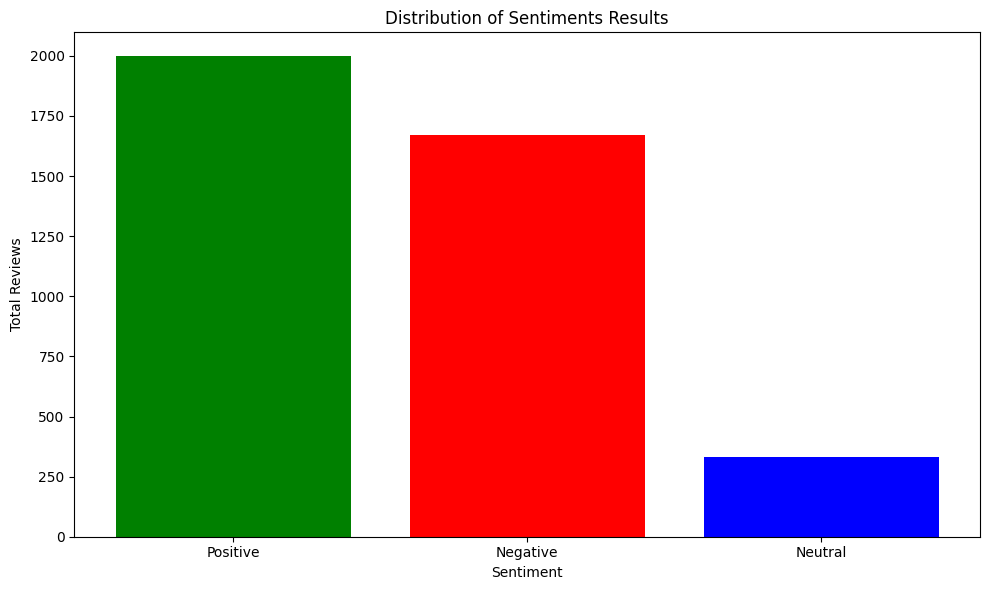

In [45]:
plt.figure(figsize=(10, 6)) # Define figure size for the plot
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'} # Define colors for each sentiment category

# Create a bar plot with sentiment categories on x-axis and total review counts on y-axis
bars = plt.bar(sentiment_df['Sentiment'], sentiment_df['Total Reviews'], color=[colors[sentiment] for sentiment in sentiment_df['Sentiment']])

# Set plot title and labels for x-axis and y-axis
plt.title('Distribution of Sentiments Results')
plt.xlabel('Sentiment')
plt.ylabel('Total Reviews')
plt.tight_layout() # Adjust layout for better presentation

plt.savefig('sentiments_barchart.png')# Save the plot as a PNG file
plt.show() # Display the plot

In [46]:
reviews_string = data['Reviews_Adjectives'].tolist() # Convert 'Reviews_Adjectives' column from DataFrame to a list of strings

reviews_string = " ".join(reviews_string) # Join all elements in the list into a single string

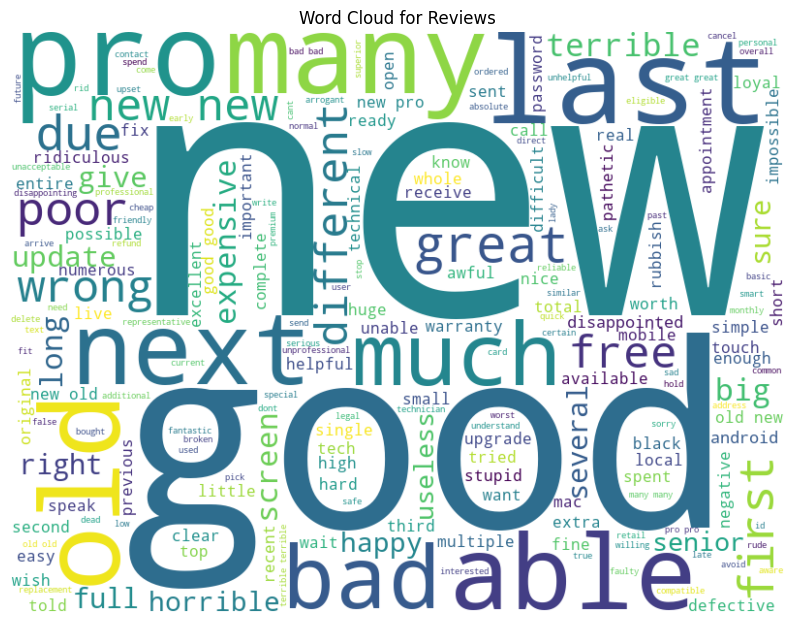

In [47]:
stopwords = set(STOPWORDS)# Set of stopwords for WordCloud

# Generate WordCloud from the concatenated string of adjectives
wordcloud = WordCloud(width=800, height=600, background_color='white', max_words=200, stopwords=stopwords).generate(reviews_string)

# Create a plot for WordCloud visualization
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title("Word Cloud for Reviews")  # Set plot title
plt.show()  # Display the plot

In [48]:
wordcloud.to_file("review_wordcloud.png") # Save the WordCloud as an image file

In [49]:
reviews_string = data['Reviews_Adjectives'].tolist()  # Convert 'Reviews_Adjectives' column to a list of strings
reviews_list = []  # Initialize an empty list to store individual words

# Iterate through each string in reviews_string
for item in reviews_string:
    item = item.split()  # Split the string into a list of words
    for i in item:
        reviews_list.append(i)  # Append each word to reviews_list


In [50]:
count = Counter(reviews_list) # Count occurrences of each word in reviews_list

wordcount_df = pd.DataFrame.from_dict(count, orient='index').reset_index() # Convert Counter dictionary to a DataFrame
wordcount_df.columns = ['Words', 'Count'] # Rename columns of the DataFrame
wordcount_df.sort_values(by='Count', ascending=False, inplace=True) # Sort DataFrame by 'Count' column in descending order

In [7]:
wordcount_df=pd.read_csv('wordcount_df.csv')

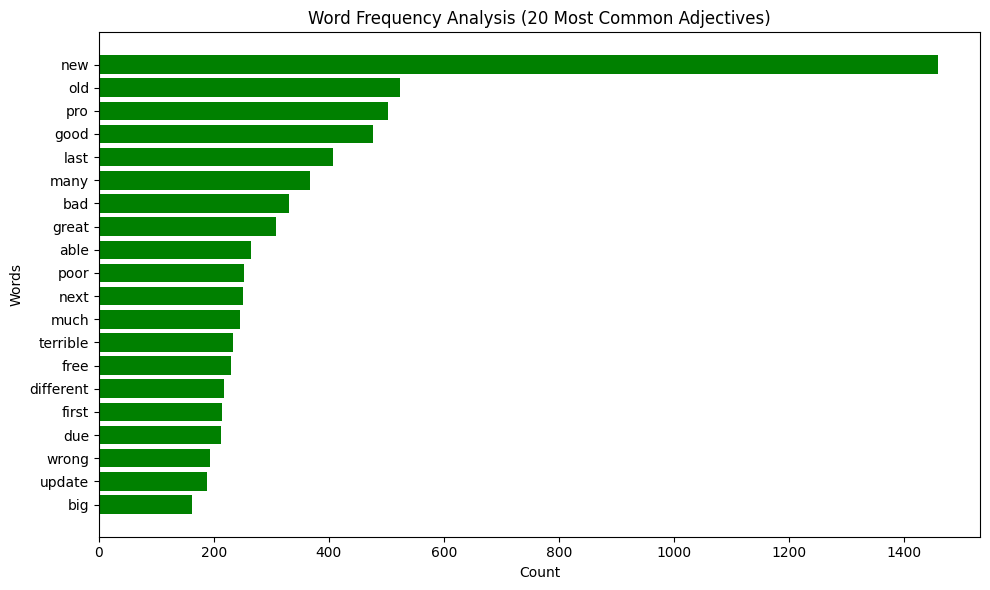

In [8]:
# Select the top 20 most frequent words based on 'Count' column
top_20_words = wordcount_df.nlargest(20, 'Count').sort_values(by='Count', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_words['Words'], top_20_words['Count'], color='green')

# Set plot title and labels for x-axis and y-axis
plt.title('Word Frequency Analysis (20 Most Common Adjectives)')
plt.xlabel('Count')
plt.ylabel('Words')

plt.tight_layout() # Adjust layout for better presentation
plt.savefig('word_frequency_chart.png') # Save the plot as a PNG file
plt.show() # Display the plot


In [52]:
data.to_csv('data.csv', index=False) # I exported the DataFrame 'data' to a CSV file named 'data.csv'

In [53]:
# I created a new DataFrame 'reviews_df' by dropping specified columns from 'data' DataFrame 
reviews_df = data.drop(['Processed_Reviews', 'Reviews_Sentiments', 'Subjectivity', 'Polarity'], axis=1)

In [54]:
reviews_df.head()  # Display the first few rows of the DataFrame reviews_df

,Review_content,Total_reviews,User_name,Rating,Location,Date,Reviews_Adjectives,Sentiment
0,Solid phones & tabletsGreat solid products bot...,31,Ray,4,United States,2024-06-23 15:40:16.479435,solid solid recommend,Positive
1,Apple es una estafa sus productos son…Apple es...,87,Israel Cabrera,1,Spain,2024-06-24 15:40:16.479435,un,Neutral
2,I just bought a new iPhone plus and it…I just ...,16,Concetta cinzia Scavuzzo,2,Italy,2024-06-23 15:40:16.479435,new bought new even little dangerous,Negative
3,This is the worst phone company in the…This is...,7,Valters Valpēteris,1,Latvia,2024-06-21 15:40:16.479435,old android,Negative
4,Cheating with me on iPadI purchased an apple i...,3,Amit Kumar,1,India,2024-06-20 15:40:16.479435,cellular natural able cellular cellular many i...,Positive


## 7. Conclusion
I saved the DataFrame as an Excel file so I could export it to PowerBI to further analyze and visualize my data

In [55]:
reviews_df.to_excel('Reviews_dataset.xlsx', index=False)  # Export reviews_df to an Excel file